In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

<class 'numpy.ndarray'>


In [3]:
n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

n_digits: 10, n_samples 1797, n_features 64
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.110

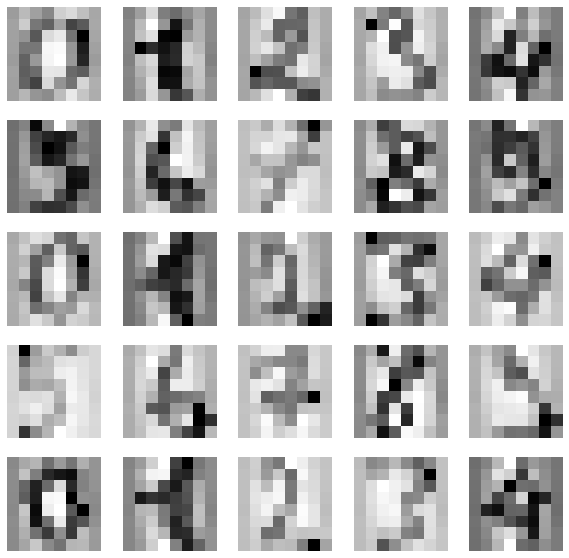

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

In [5]:
##############################################################################
## 1 Test/Train Split
##############################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

In [6]:
#2
svc = svm.SVC(kernel='rbf', C=100, gamma='auto')

In [7]:
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy =  0.952712100139082


In [8]:
#3
conf_mat1 = confusion_matrix(y_test, pred)
print(conf_mat1)

##My biggest mistakes are 8 and 0.

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]


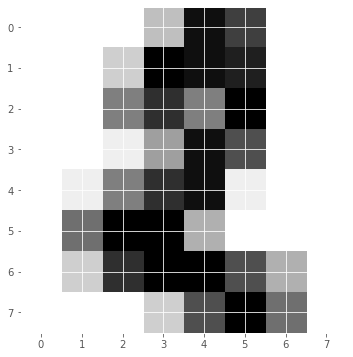

2


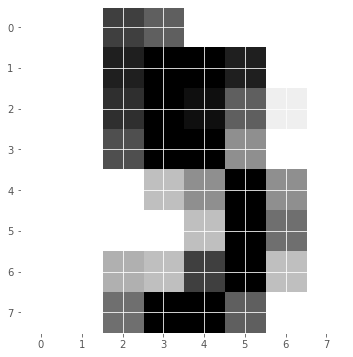

5


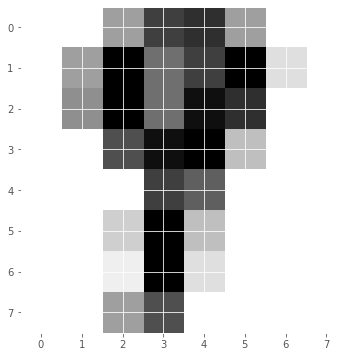

69


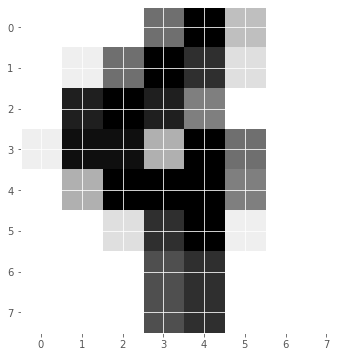

87


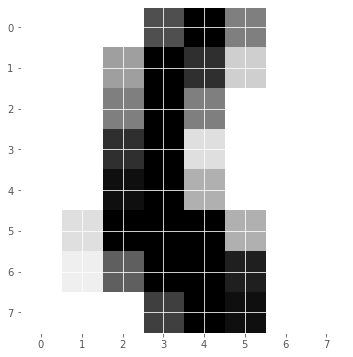

95


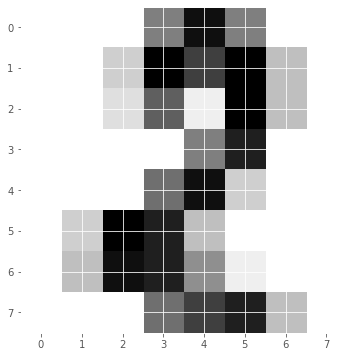

115


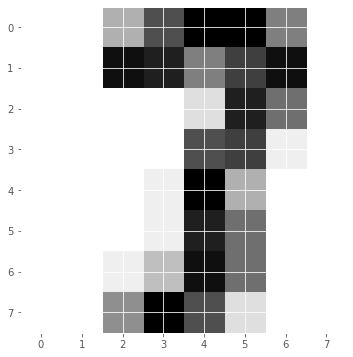

231


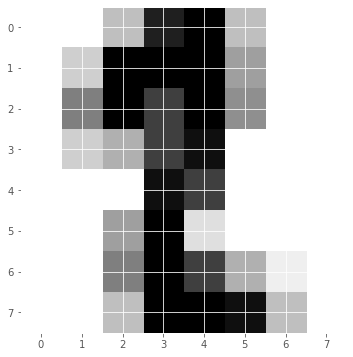

244


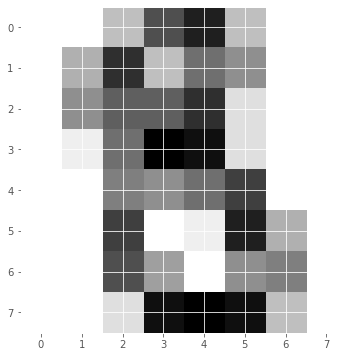

378


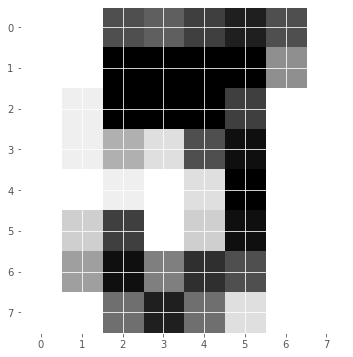

421


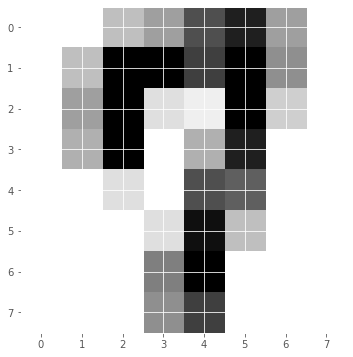

480


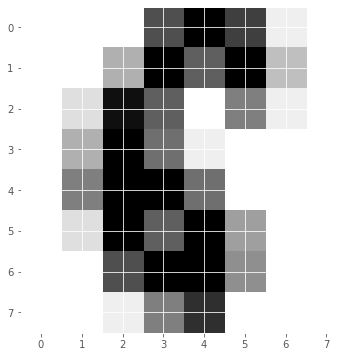

492


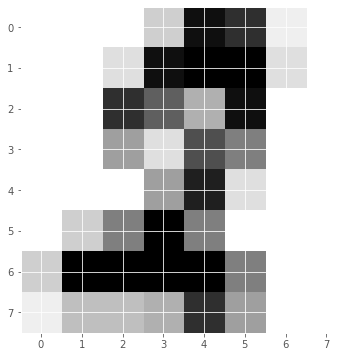

502


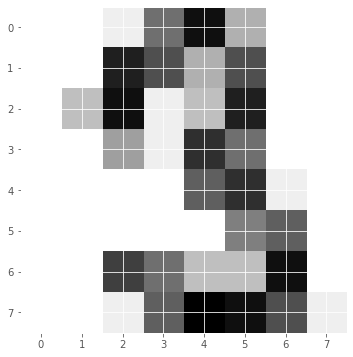

519


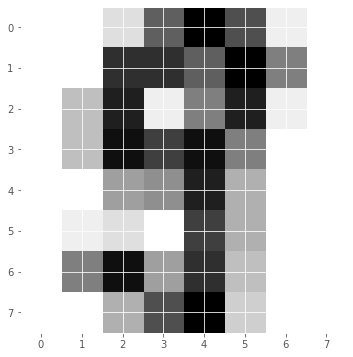

547


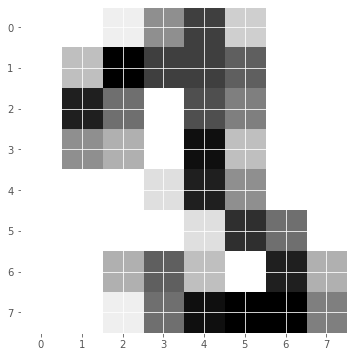

599


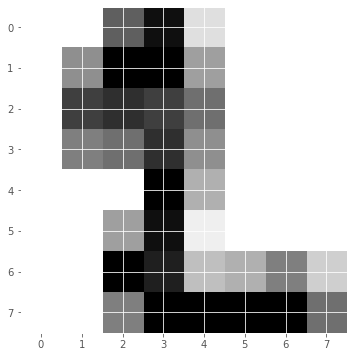

600


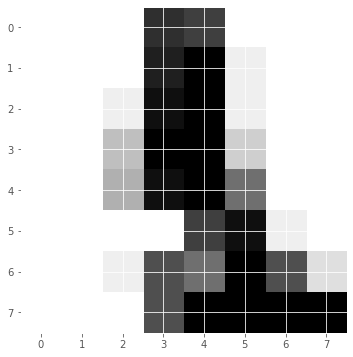

623


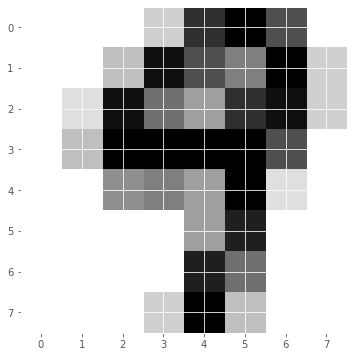

655


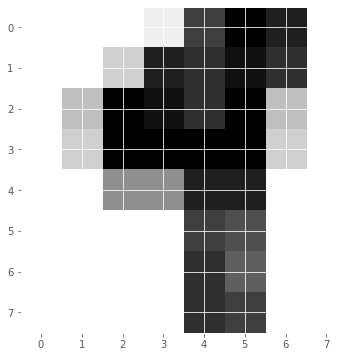

683


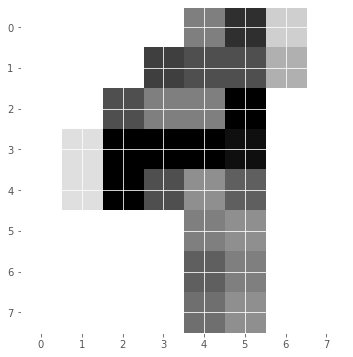

719


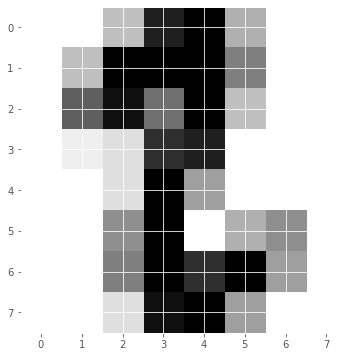

723


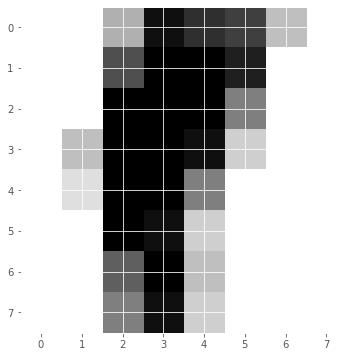

731


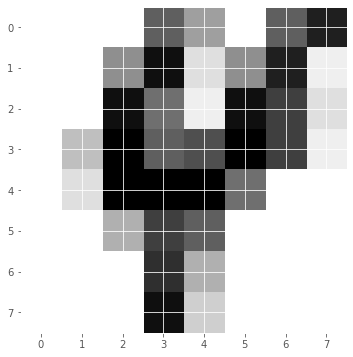

757


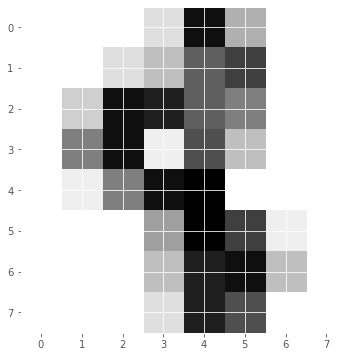

794


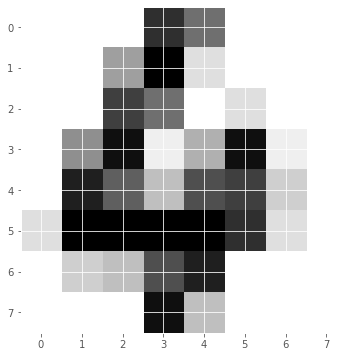

800


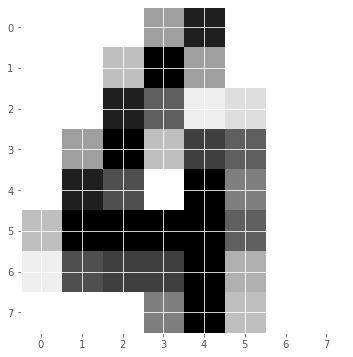

873


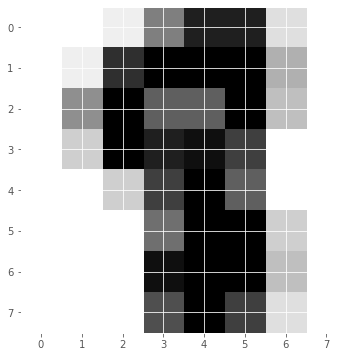

890


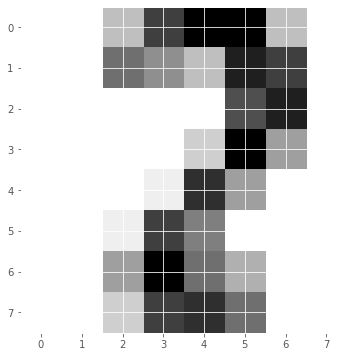

891


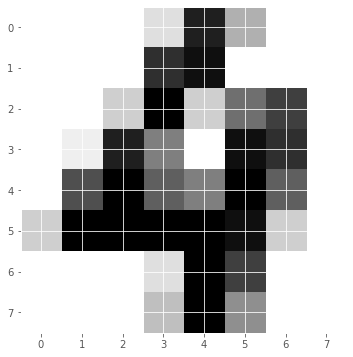

919


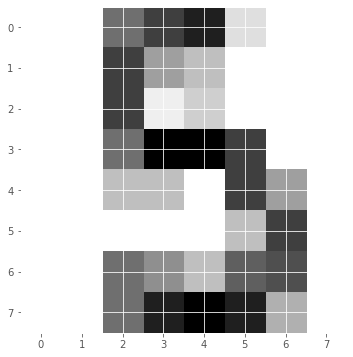

930


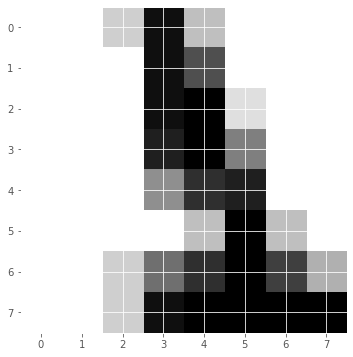

947


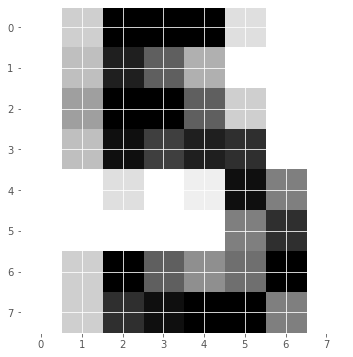

951


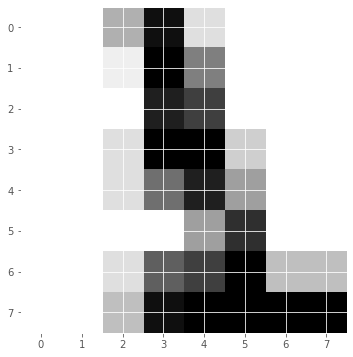

972


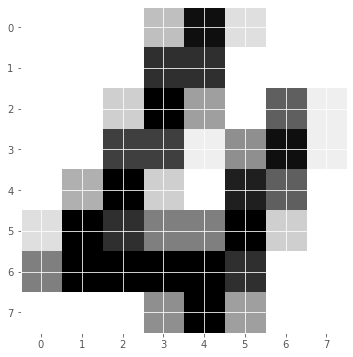

988


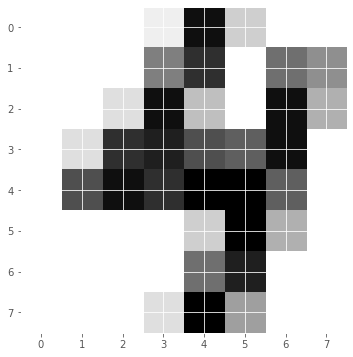

998


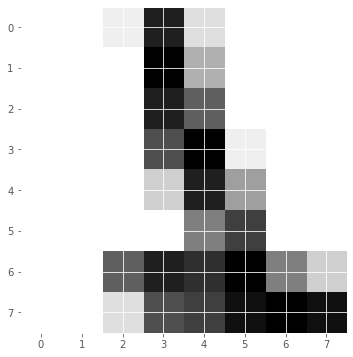

1000


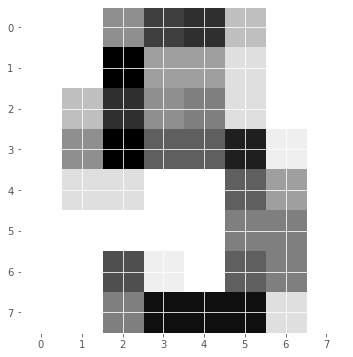

1018


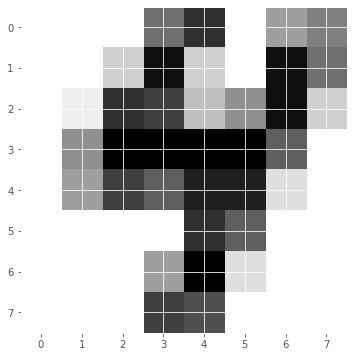

1022


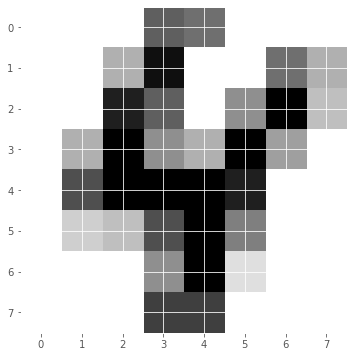

1023


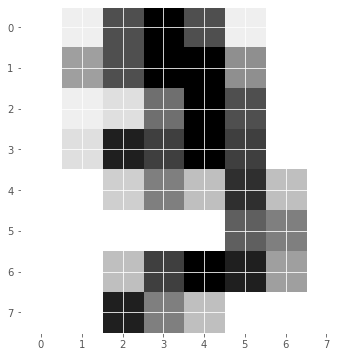

1038


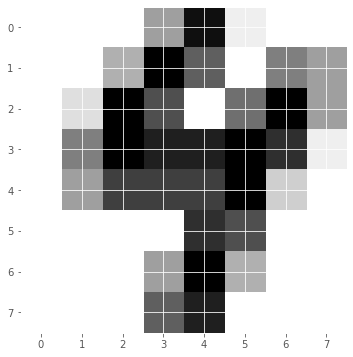

1043


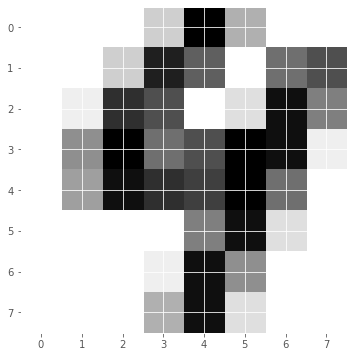

1070


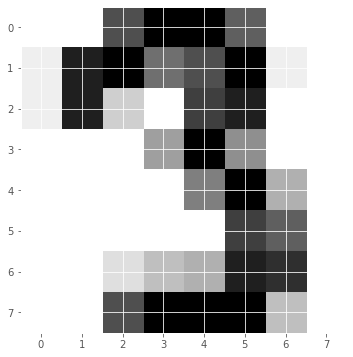

1086


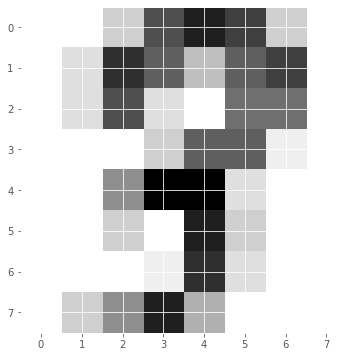

1118


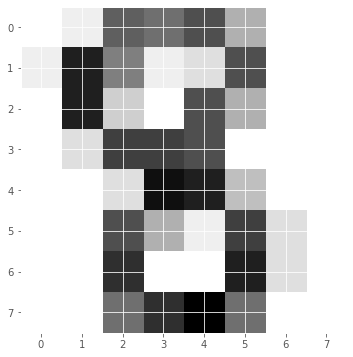

1165


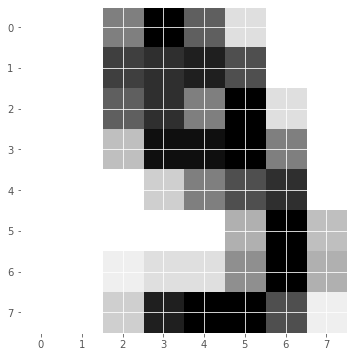

1176


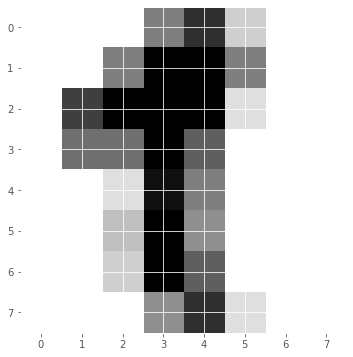

1178


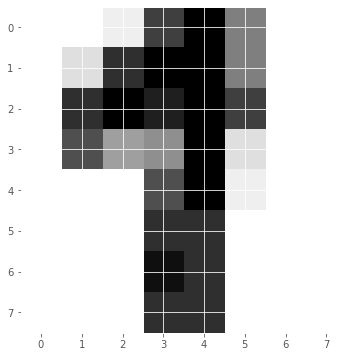

1242


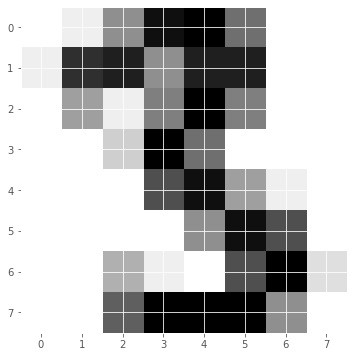

1248


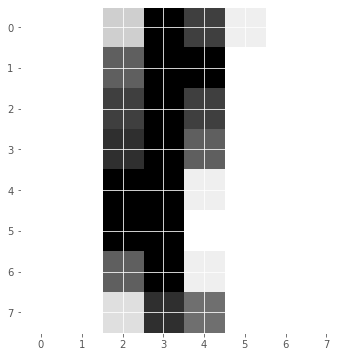

1256


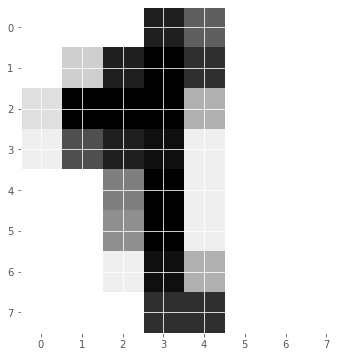

1264


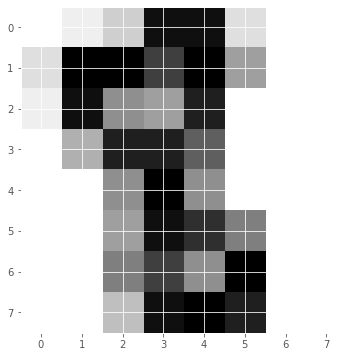

1271


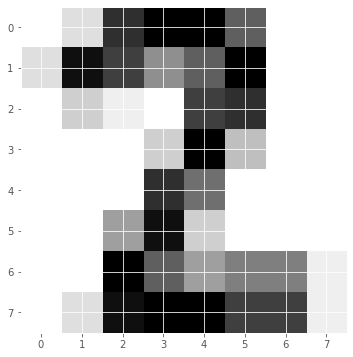

1273


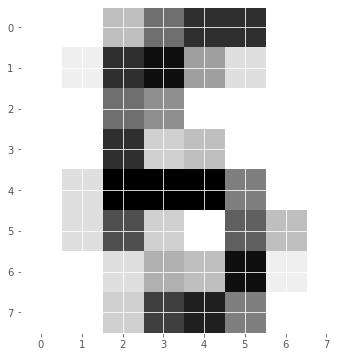

1361


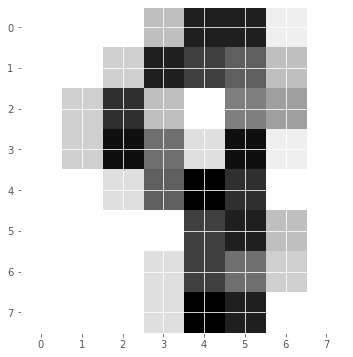

1468


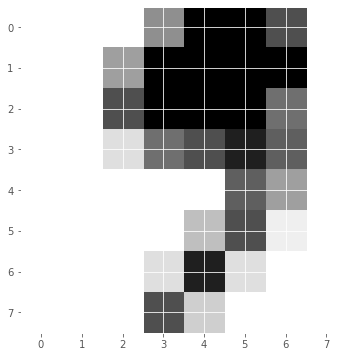

1562


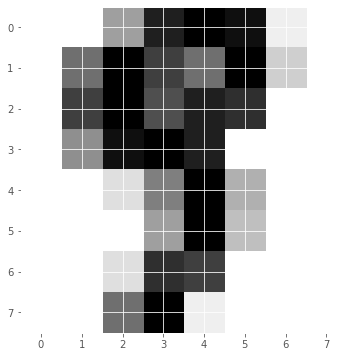

1582


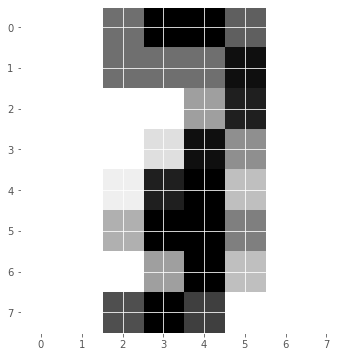

1605


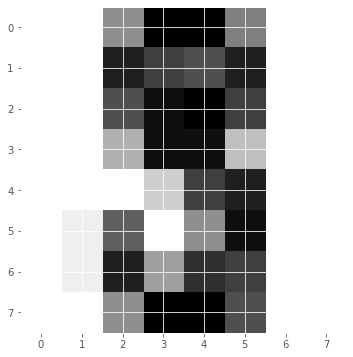

1658


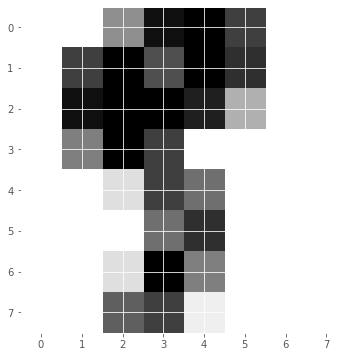

1662


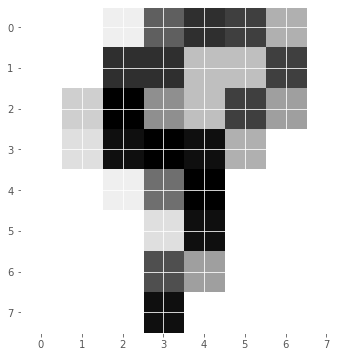

1665


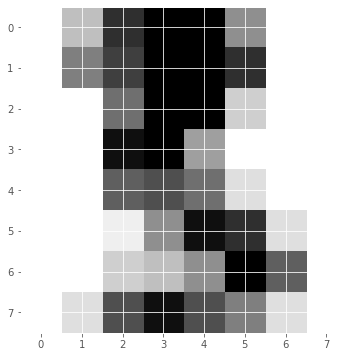

1690


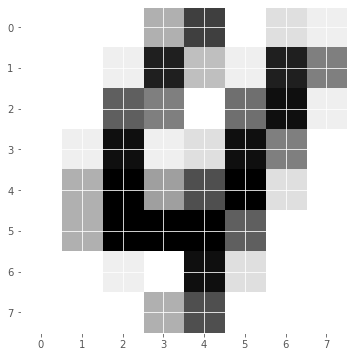

1708


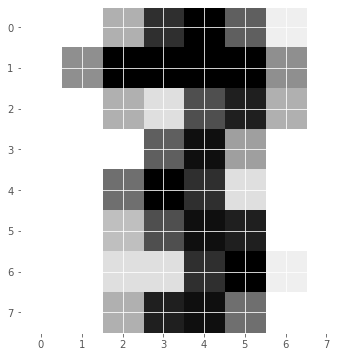

1726


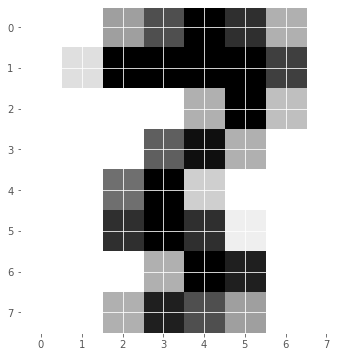

1727


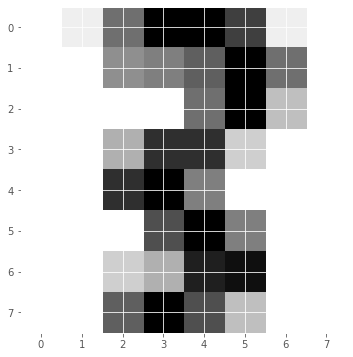

1730


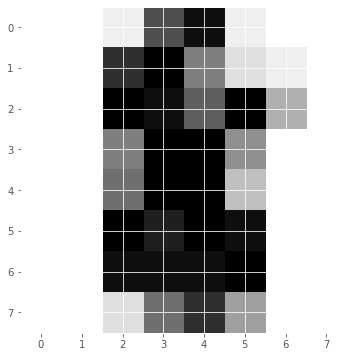

1794


In [9]:
##############################################################################
## 4 Print
##############################################################################
pred_all = svc.predict(X)

for i in range(len(y)):
    if y[i] != pred_all[i]:
        plt.figure()
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        print(i)


In [10]:
##############################################################################
## 5 Cross Val
##############################################################################
predicted = cross_val_predict(estimator=svc, X=X, y=y)
y_pred = pd.Series(predicted)

print('Accuracy = ', metrics.accuracy_score(y_true = y, y_pred = y_pred))

conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
     
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)        
scores = cross_val_score(svc, X, y, cv=cv)
print(scores)    

Accuracy =  0.9543683917640512
[[177   0   0   0   1   0   0   0   0   0]
 [  0 179   1   0   1   0   0   0   1   0]
 [  0   2 169   0   3   0   0   0   3   0]
 [  0   0   1 166   2   3   0   1   8   2]
 [  0   0   6   0 170   0   0   2   0   3]
 [  0   0   0   0   0 176   1   0   1   4]
 [  0   0   0   0   6   1 173   0   1   0]
 [  0   0   0   0   3   0   0 173   0   3]
 [  0   7   1   0   3   0   0   1 161   1]
 [  0   0   0   0   1   3   0   2   3 171]]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]


In [11]:
##############################################################################
##Test Cost
##############################################################################
s = []
for i in range(1,501,5):
    svc = svm.SVC(kernel='rbf', C=i, gamma='auto')
    scores = cross_val_score(svc, X, y, cv=cv)
    s.append(np.mean(scores))
    print(scores)     

print(s)

# 5 was my best average score

[0.98518519 0.97592593 0.98703704 0.97407407 0.98148148]
[0.98148148 0.98148148 0.98888889 0.97037037 0.98333333]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.98703704 0.97037037 0.98148148]
[0.98148148 0.98148148 0.987037

In [12]:
##############################################################################
## 6 Unscaled Data
##############################################################################
x_unscaled = digits.data
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, random_state=1, test_size=0.8)


svc = svm.SVC(kernel='rbf', C=100, gamma='auto')

svc.fit(X_train,y_train)
pred = svc.predict(X_test)

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = pred))

print(confusion_matrix(y_test, pred))     

#My accuracy was 11.8

Accuracy =  0.11821974965229486
[[130   0   0   0   0   0   0   0   0   0]
 [131  18   0   0   0   0   0   0   0   0]
 [140   0   2   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [152   0   0   0   0   0   0   0   0   0]
 [147   0   0   0   0   0   0   0   0   0]
 [139   0   0   0   0   0   7   0   0   0]
 [128   0   0   0   0   0   0  12   0   0]
 [132   0   0   0   0   0   0   0   1   0]
 [152   0   0   0   0   0   0   0   0   0]]


In [13]:
##############################################################################
##KNN
##############################################################################        
#1&2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
nca = NeighborhoodComponentsAnalysis(random_state=1)
knn = KNeighborsClassifier(n_neighbors=10)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))        
knn.fit(X_train, y_train)

0.9367176634214186


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [14]:
#3
knn_pred = nca_pipe.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = knn_pred))

conf_mat = confusion_matrix(y_test, knn_pred)
print(conf_mat)

##My biggest mistakes are 8 and 9.

Accuracy =  0.9179415855354659
[[130   0   0   0   0   0   0   0   0   0]
 [  0 141   7   0   0   0   0   0   1   0]
 [  1   4 127   4   0   0   0   1   5   0]
 [  0   1   1 134   0   0   1   6   3   1]
 [  1   0   0   0 147   0   0   4   0   0]
 [  2   1   0   0   1 135   5   0   0   3]
 [  0   2   2   1   0   0 141   0   0   0]
 [  0   0   0   0   5   0   0 135   0   0]
 [  0  14   1   2   0   0   3   2 110   1]
 [  0   4   1   9   4   3   0   6   5 120]]


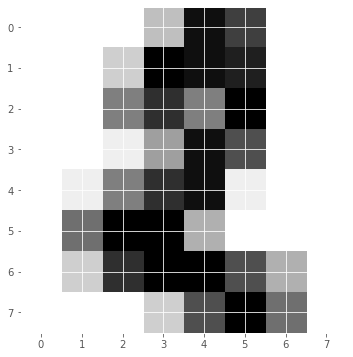

2


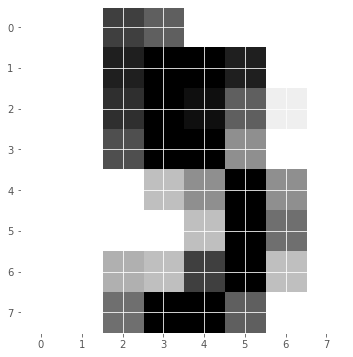

5


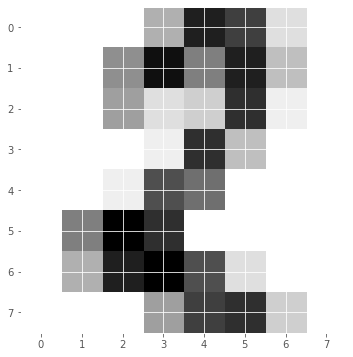

50


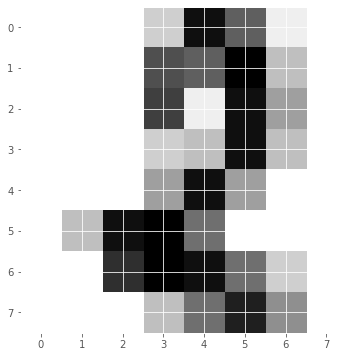

51


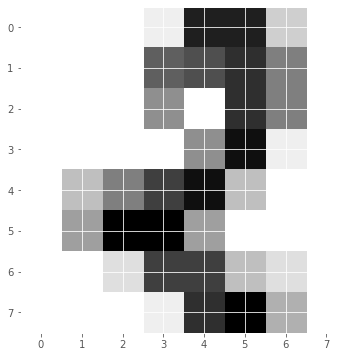

54


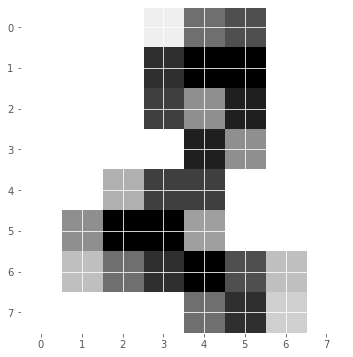

57


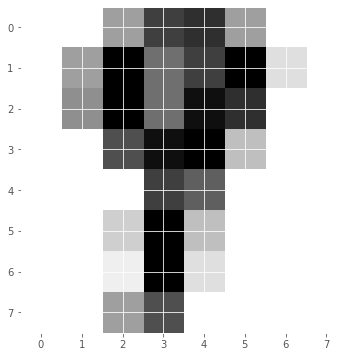

69


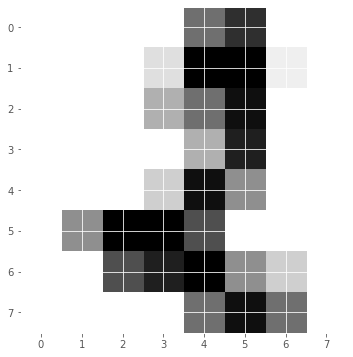

75


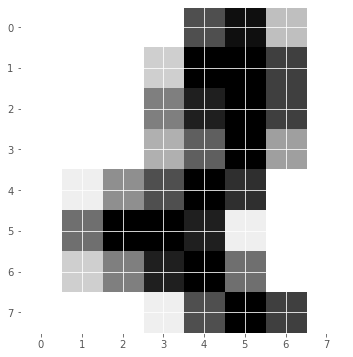

77


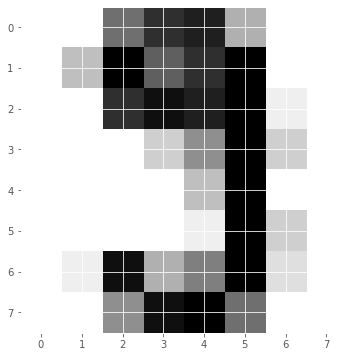

92


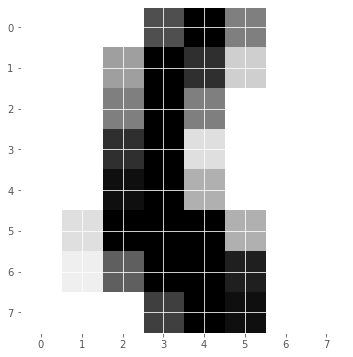

95


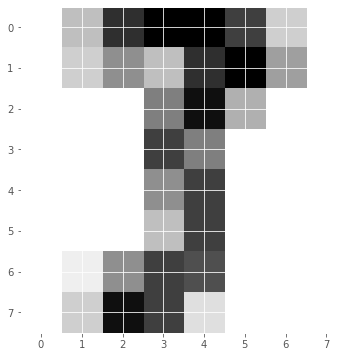

103


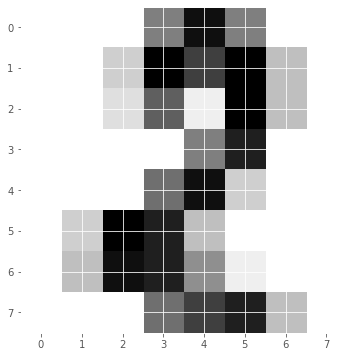

115


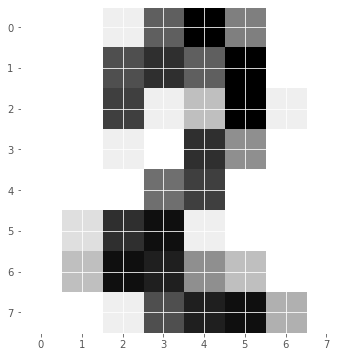

116


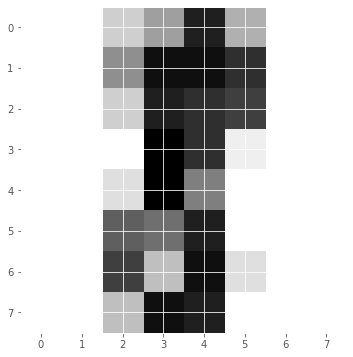

122


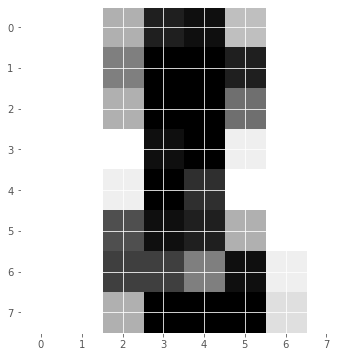

123


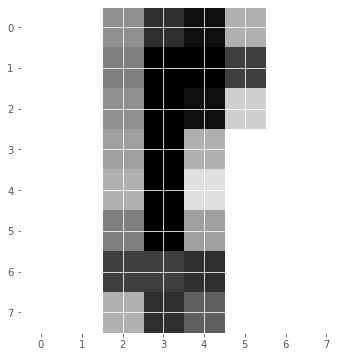

129


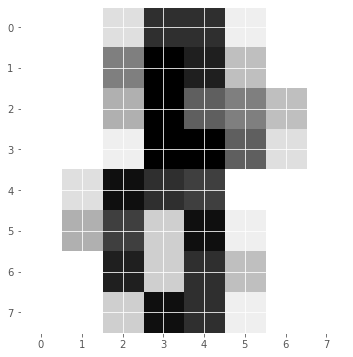

158


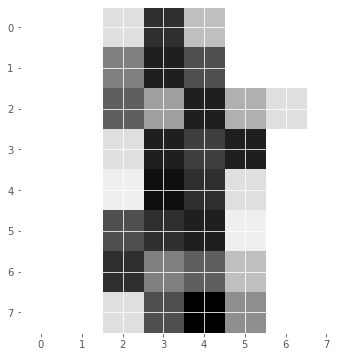

170


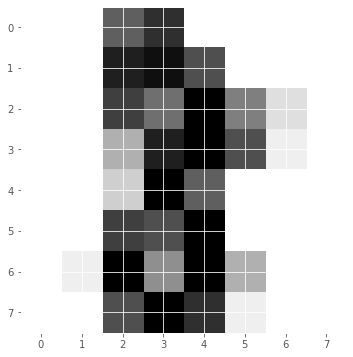

206


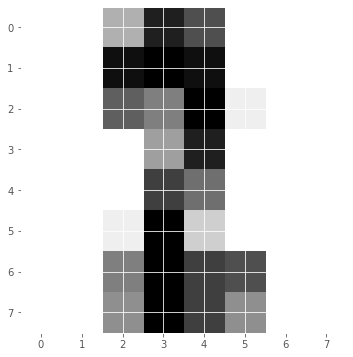

207


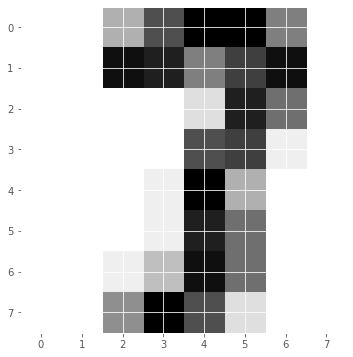

231


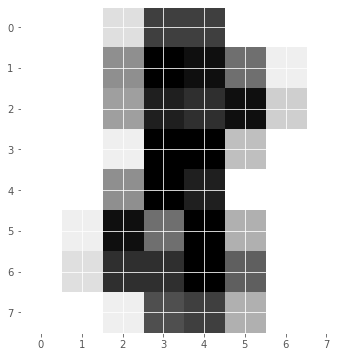

242


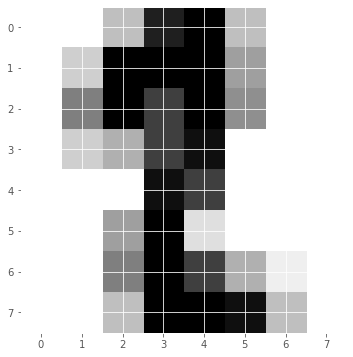

244


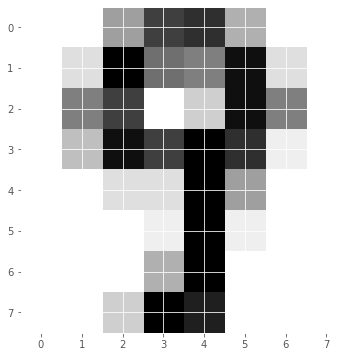

265


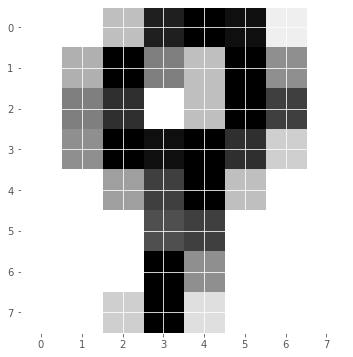

275


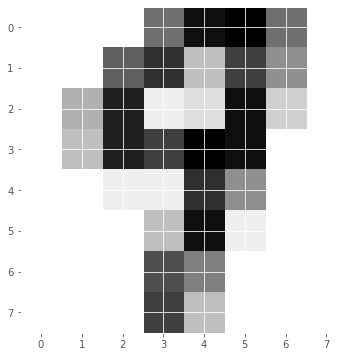

325


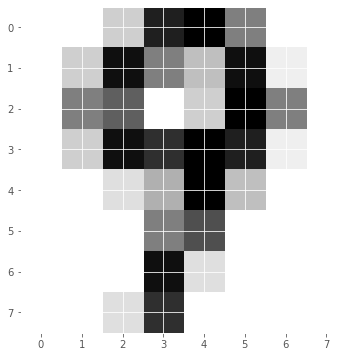

329


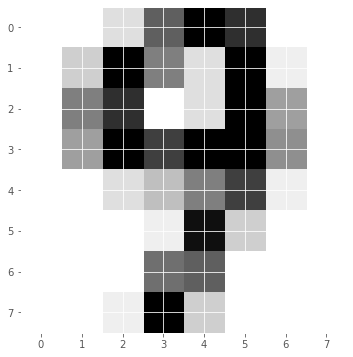

348


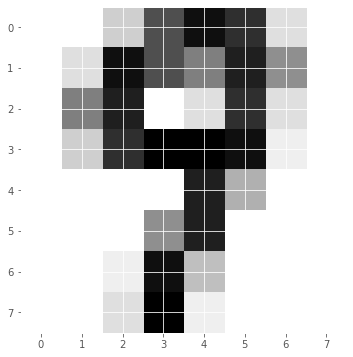

361


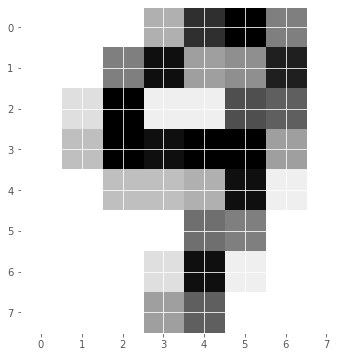

375


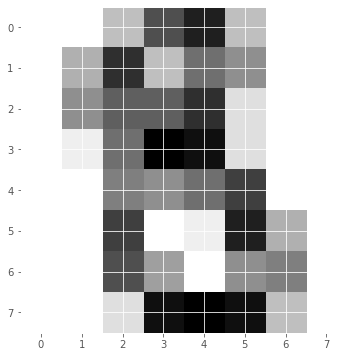

378


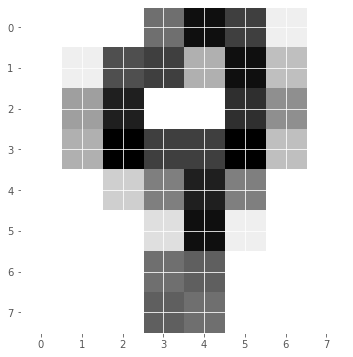

384


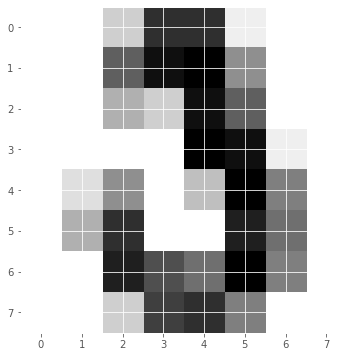

409


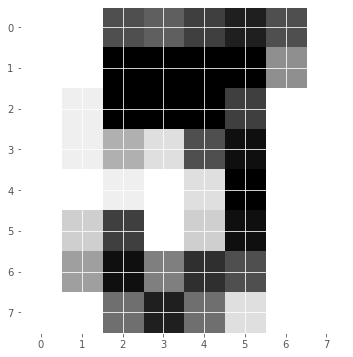

421


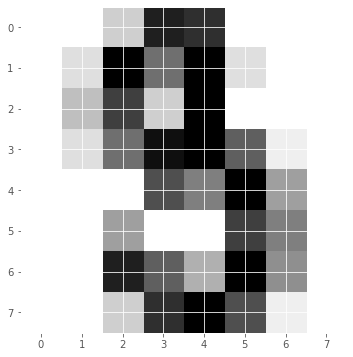

446


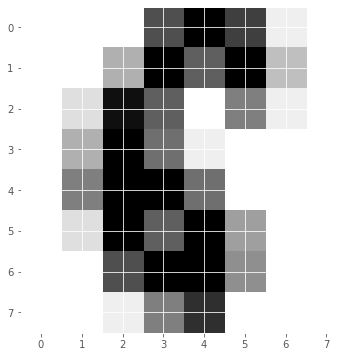

492


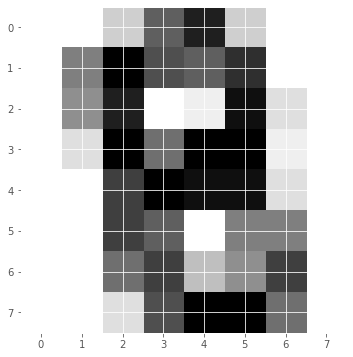

500


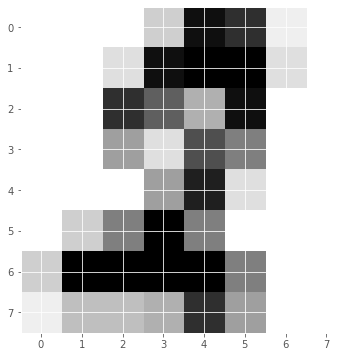

502


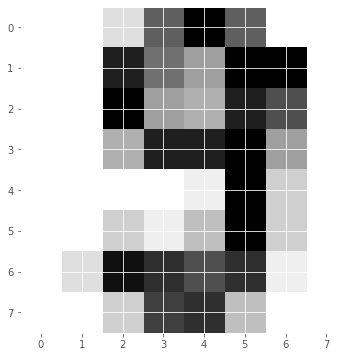

511


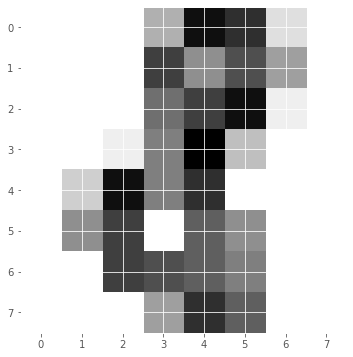

524


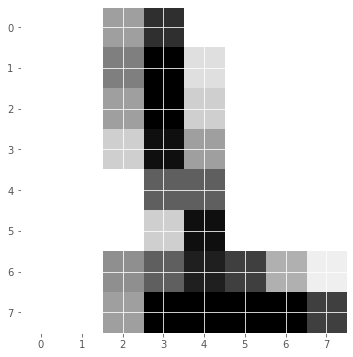

527


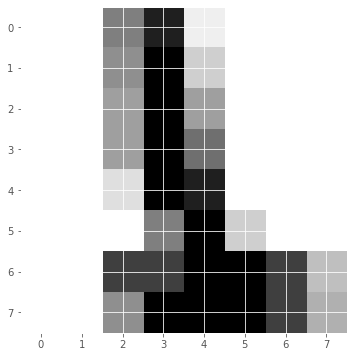

537


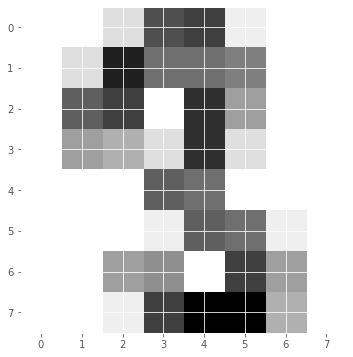

539


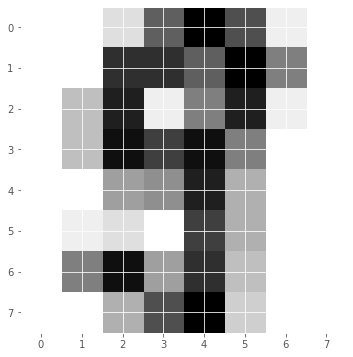

547


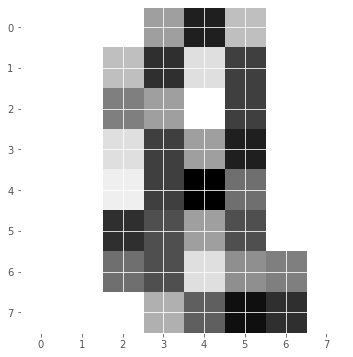

569


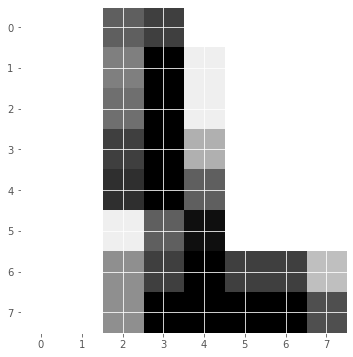

572


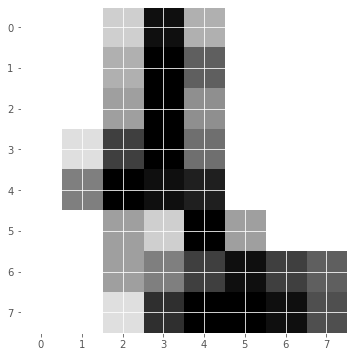

586


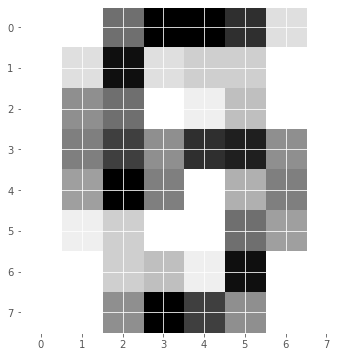

590


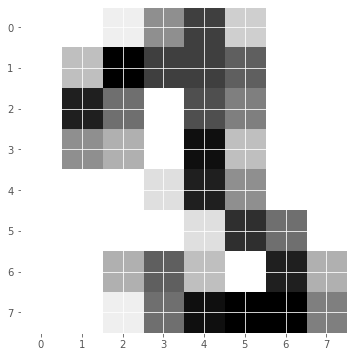

599


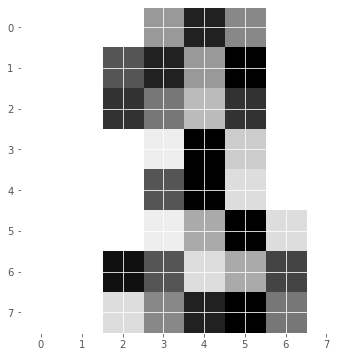

605


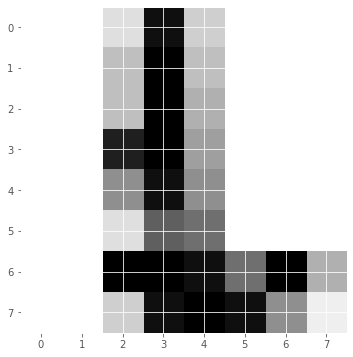

606


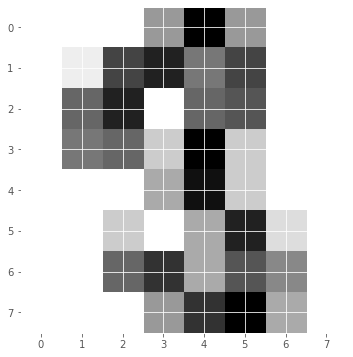

607


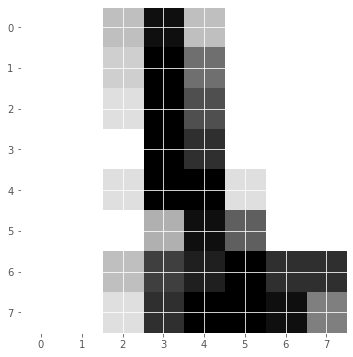

609


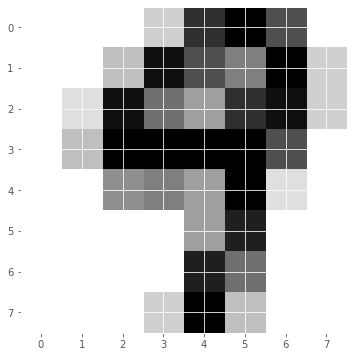

655


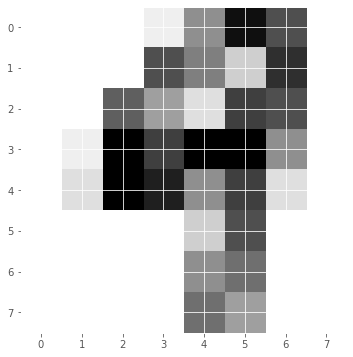

665


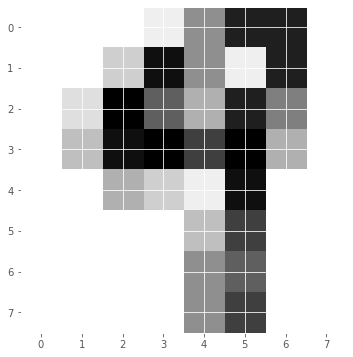

675


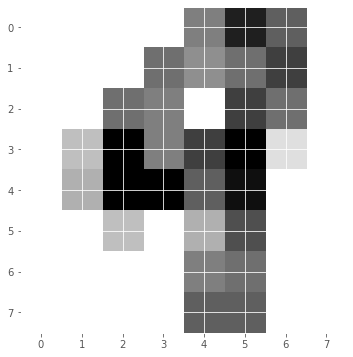

677


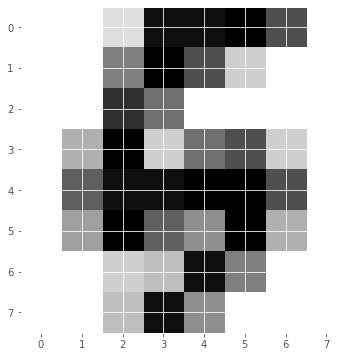

678


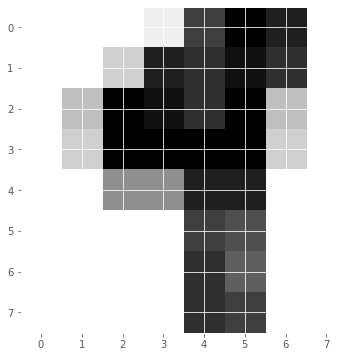

683


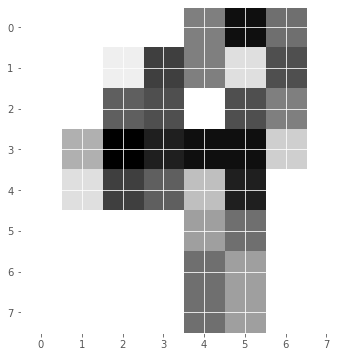

685


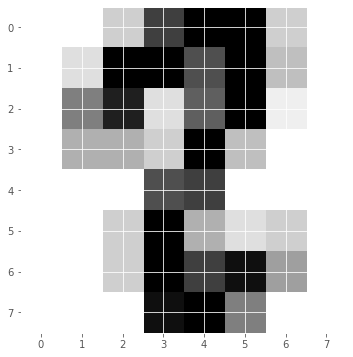

700


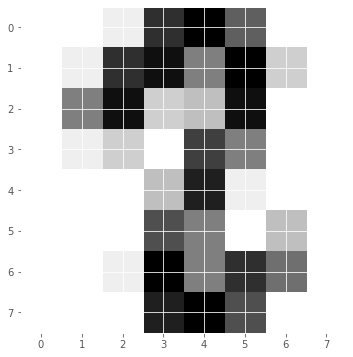

703


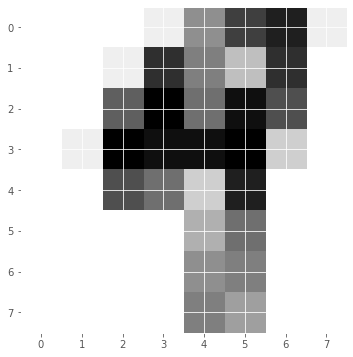

715


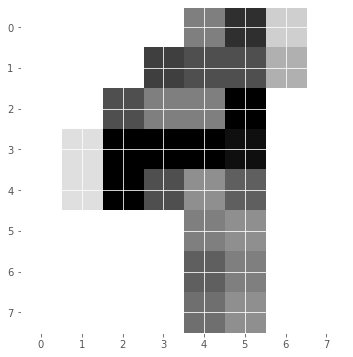

719


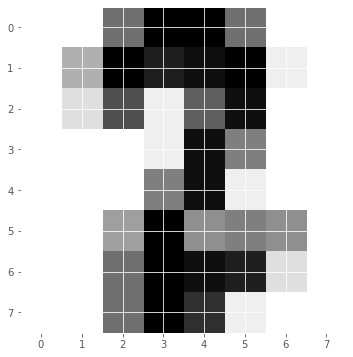

721


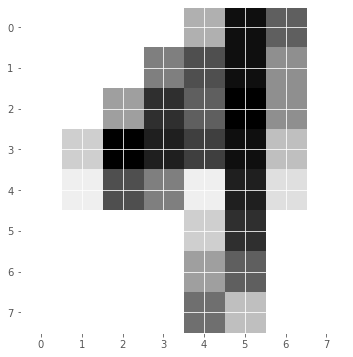

738


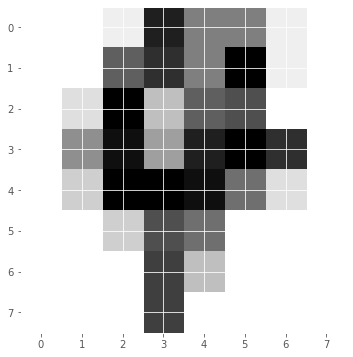

746


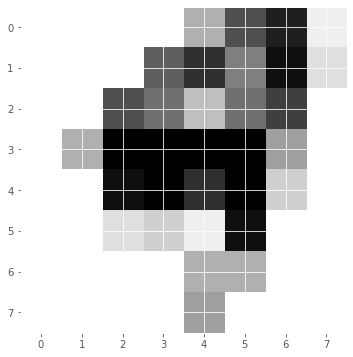

751


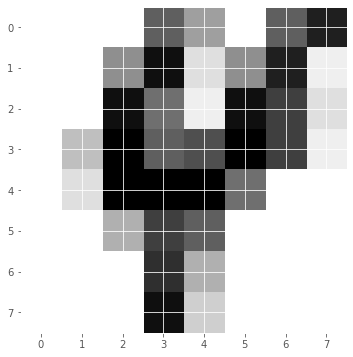

757


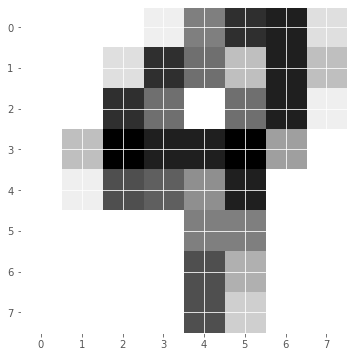

765


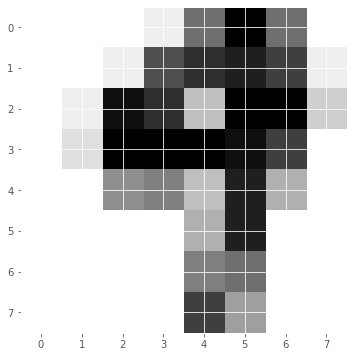

771


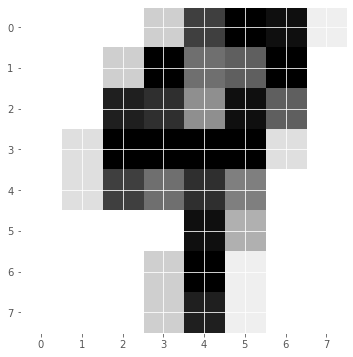

774


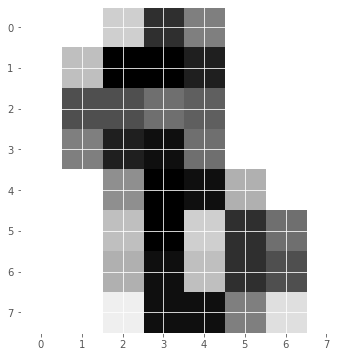

784


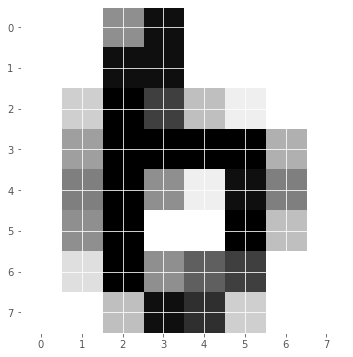

792


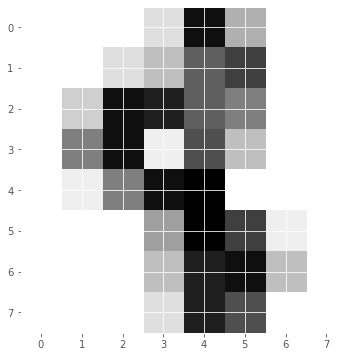

794


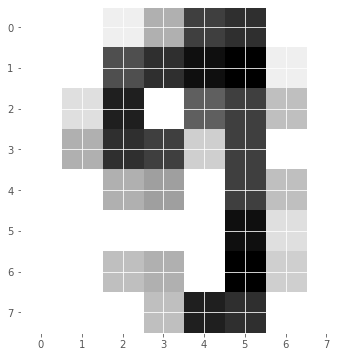

795


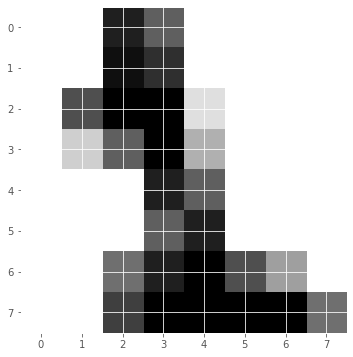

832


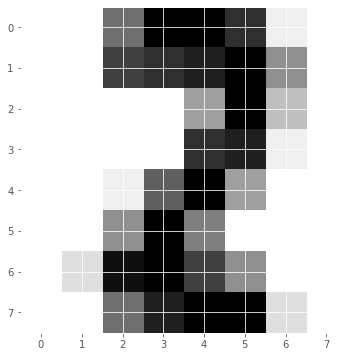

860


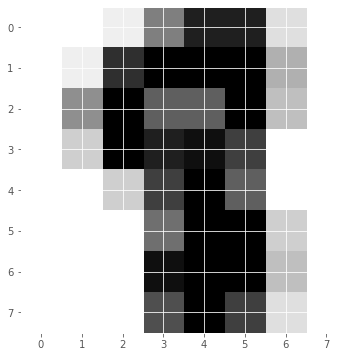

890


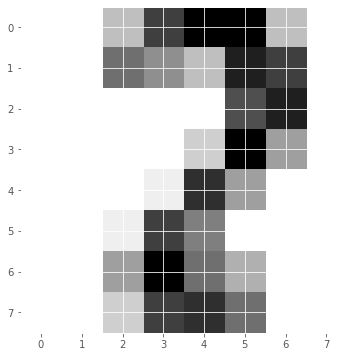

891


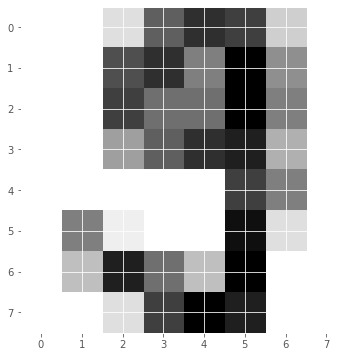

895


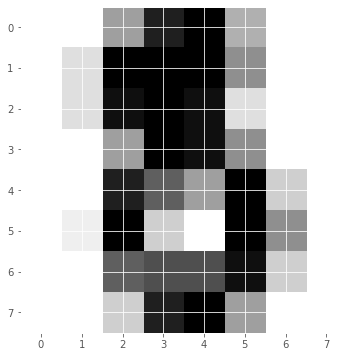

899


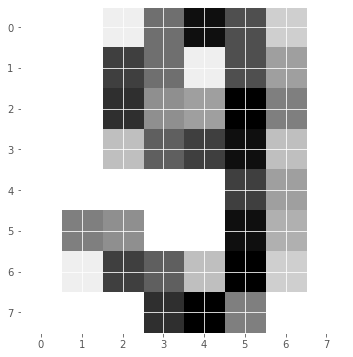

901


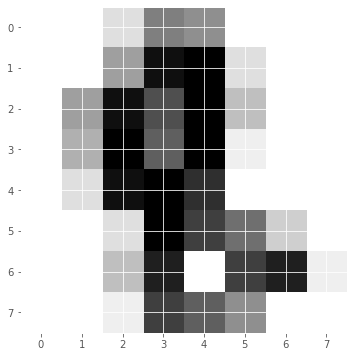

905


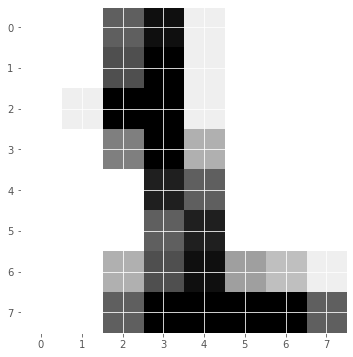

906


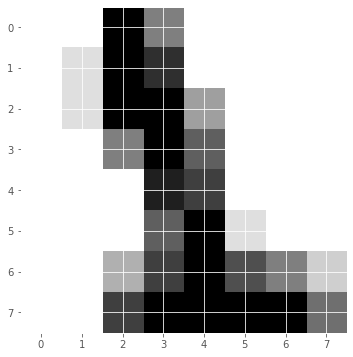

916


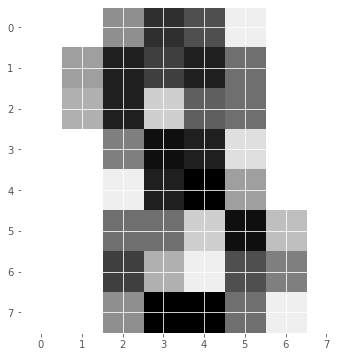

923


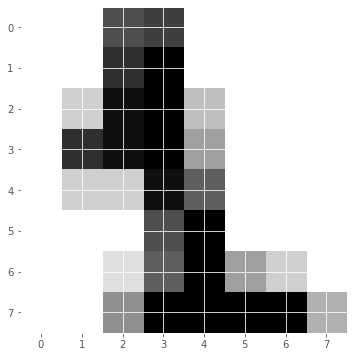

926


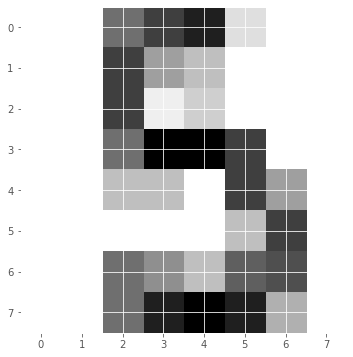

930


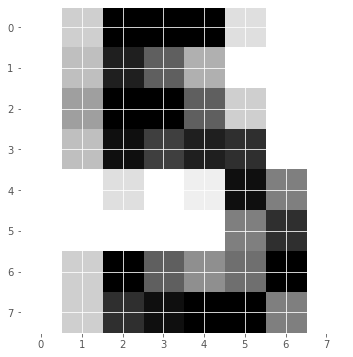

951


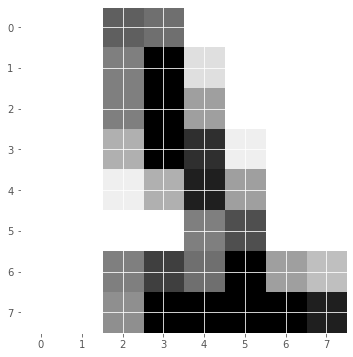

952


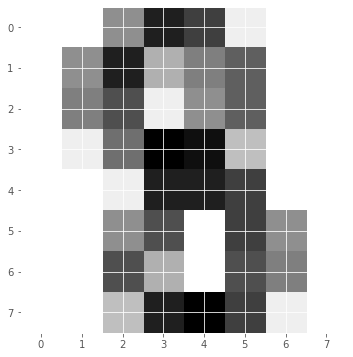

955


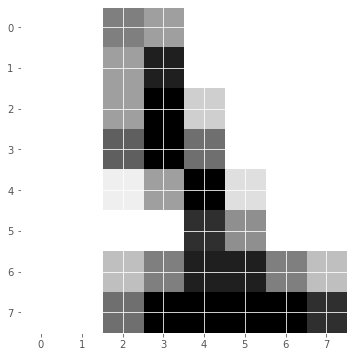

958


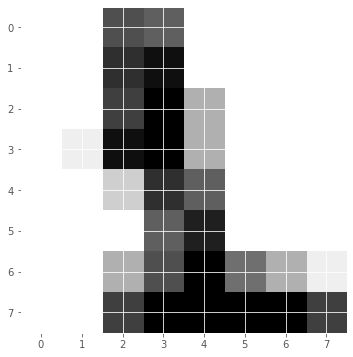

987


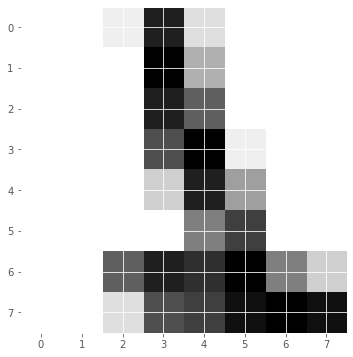

1000


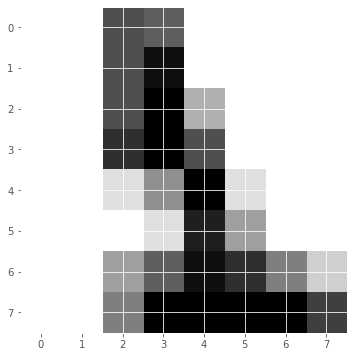

1008


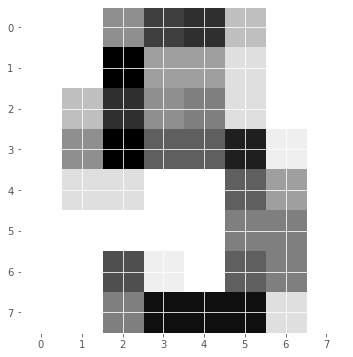

1018


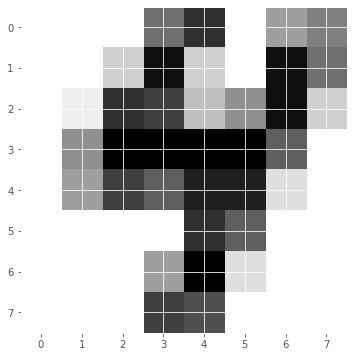

1022


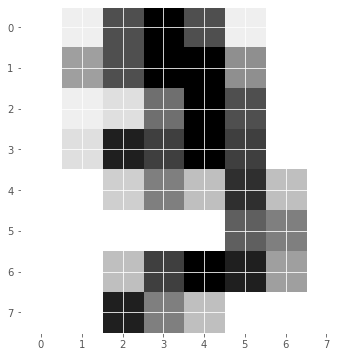

1038


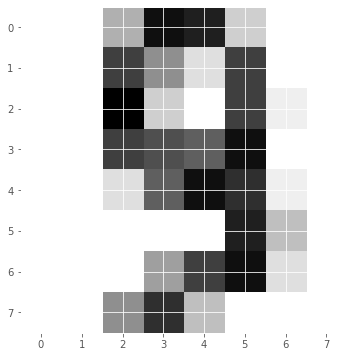

1068


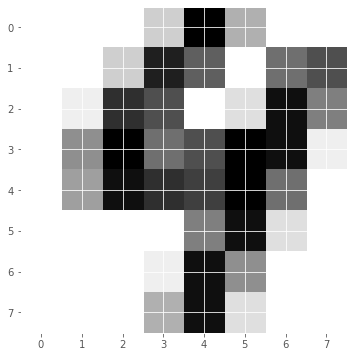

1070


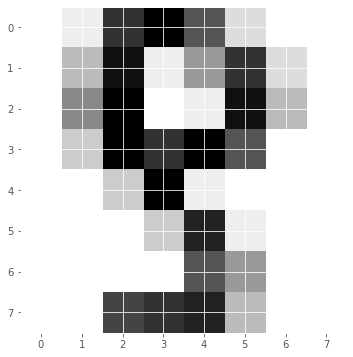

1100


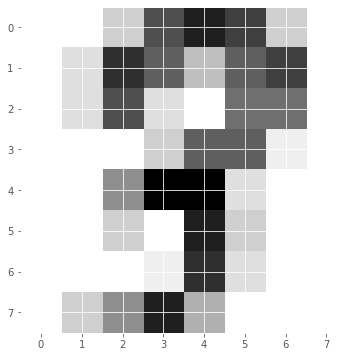

1118


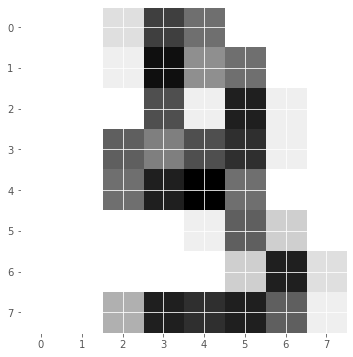

1152


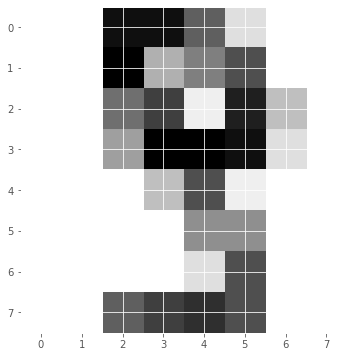

1155


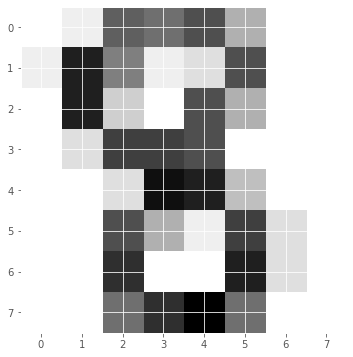

1165


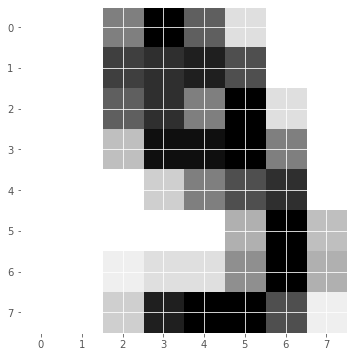

1176


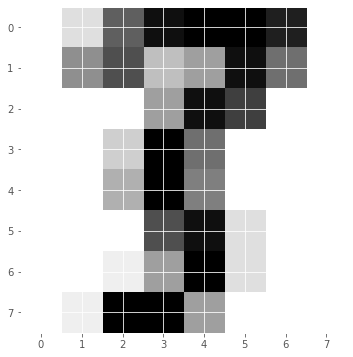

1202


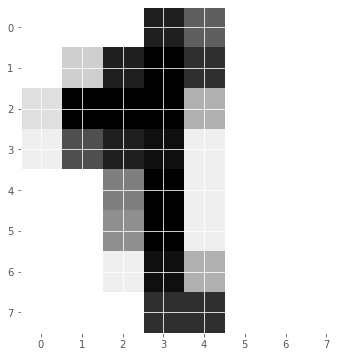

1264


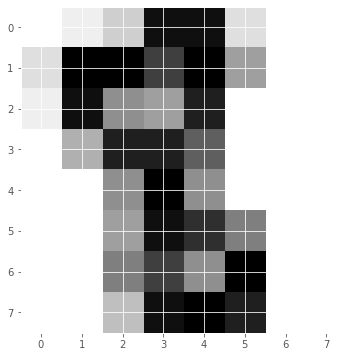

1271


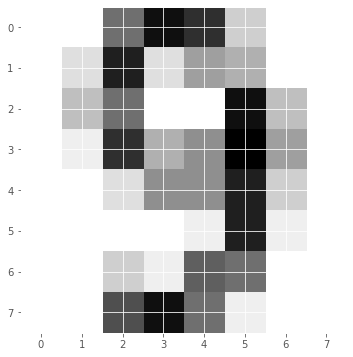

1285


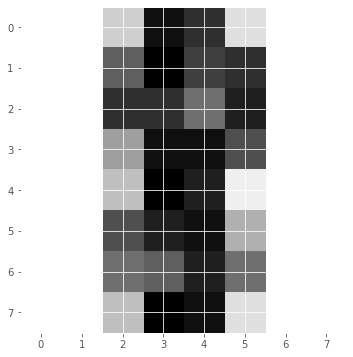

1327


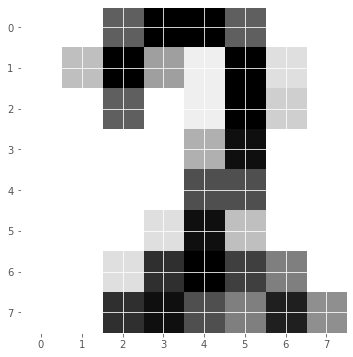

1337


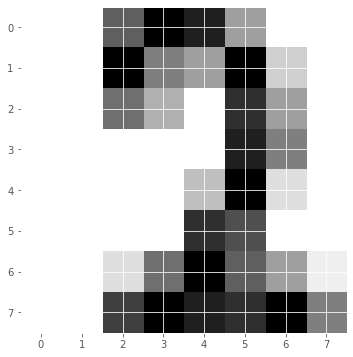

1338


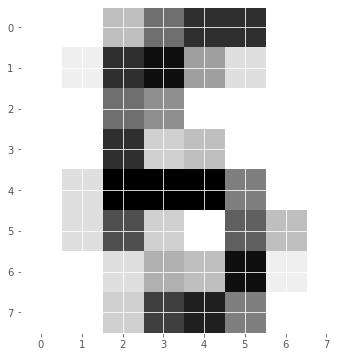

1361


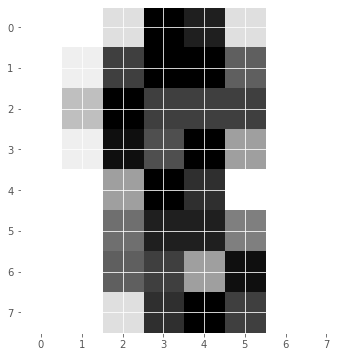

1363


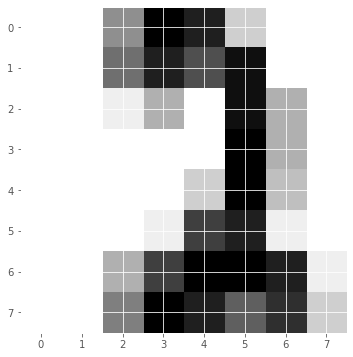

1364


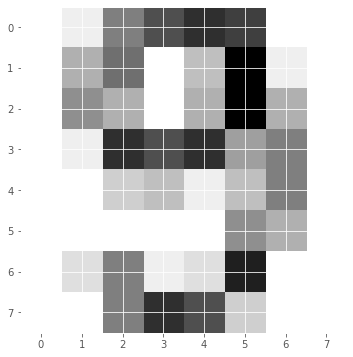

1406


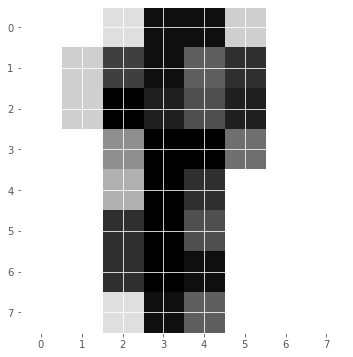

1409


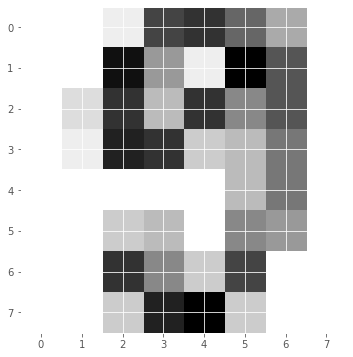

1412


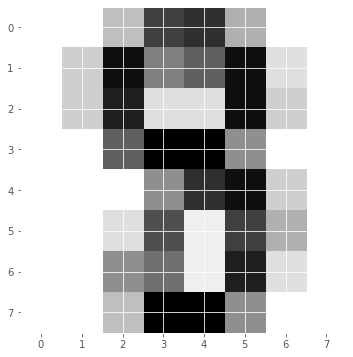

1423


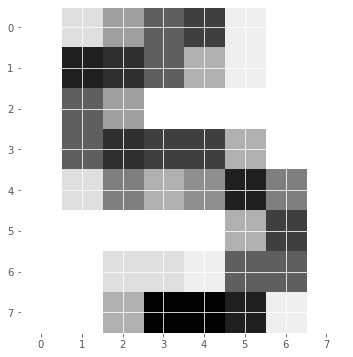

1440


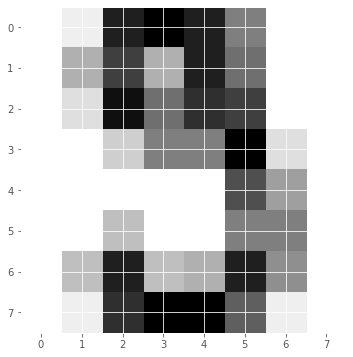

1454


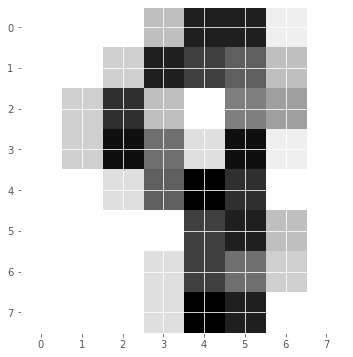

1468


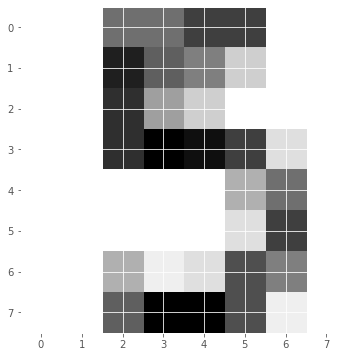

1524


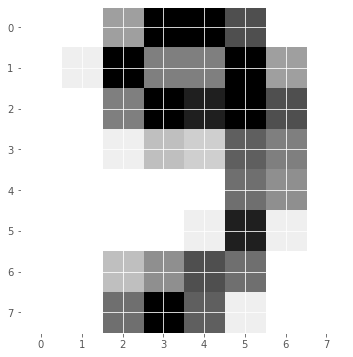

1540


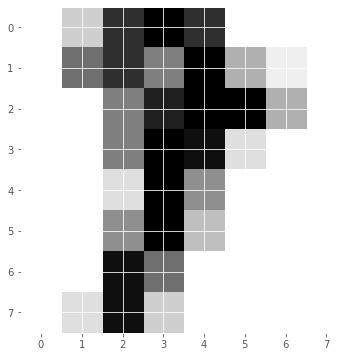

1552


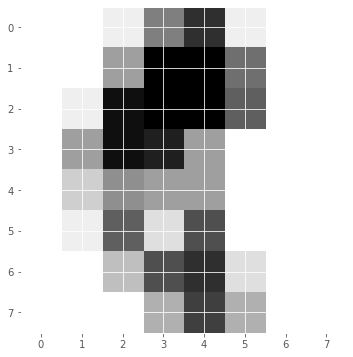

1553


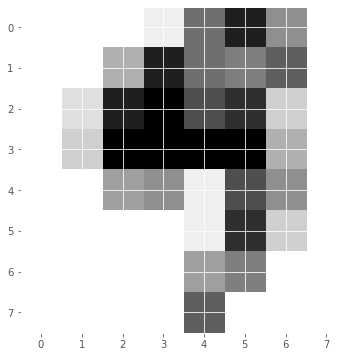

1554


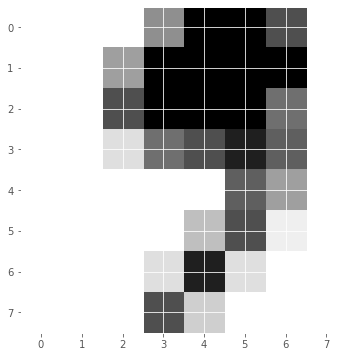

1562


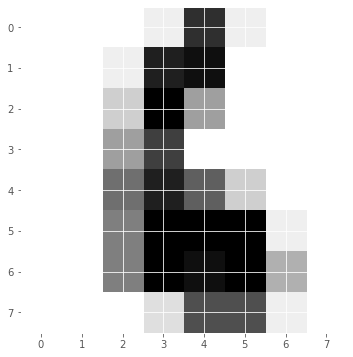

1569


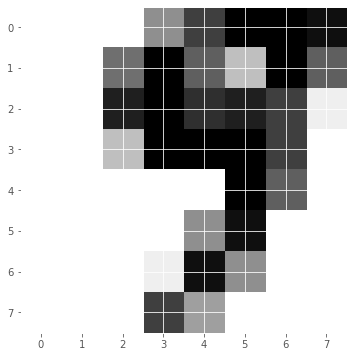

1572


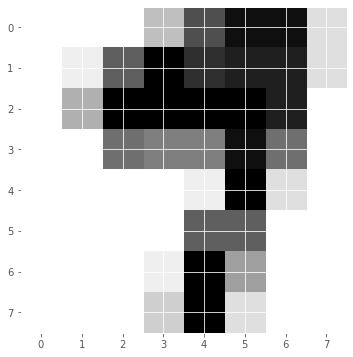

1574


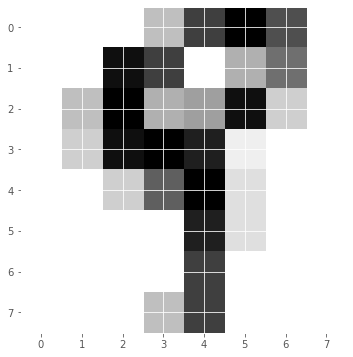

1580


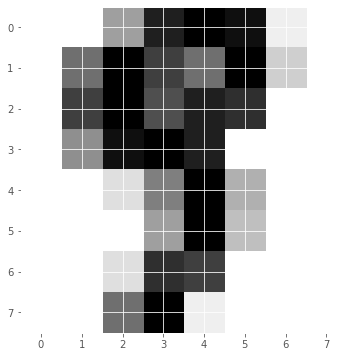

1582


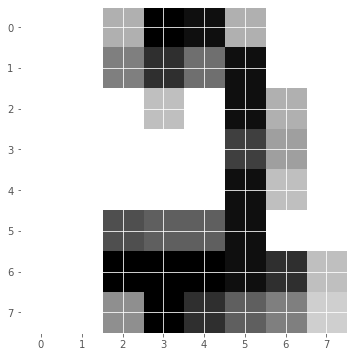

1593


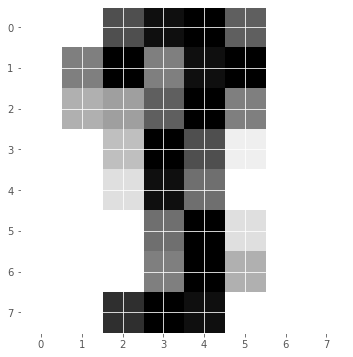

1602


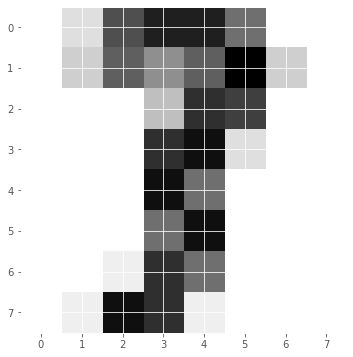

1603


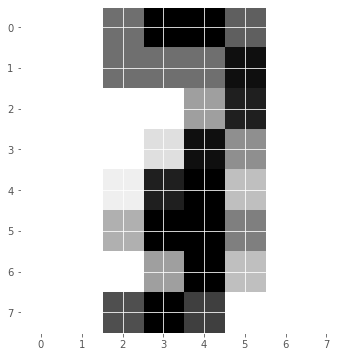

1605


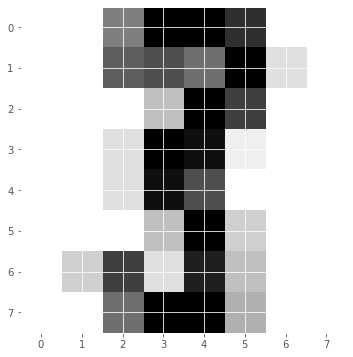

1606


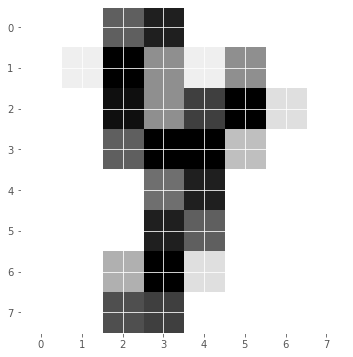

1611


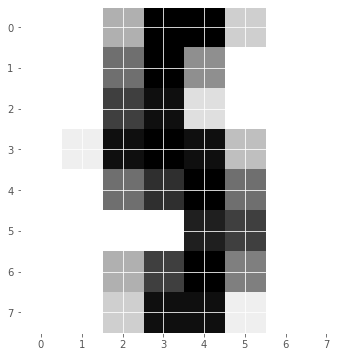

1617


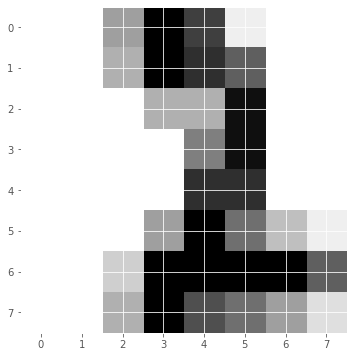

1618


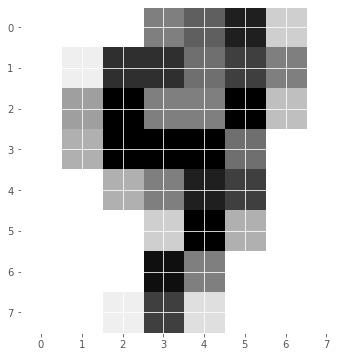

1633


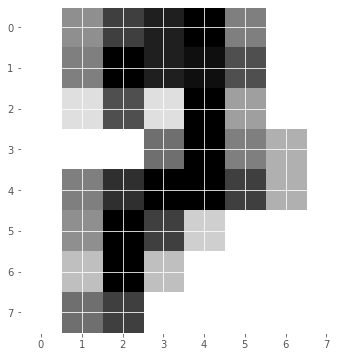

1657


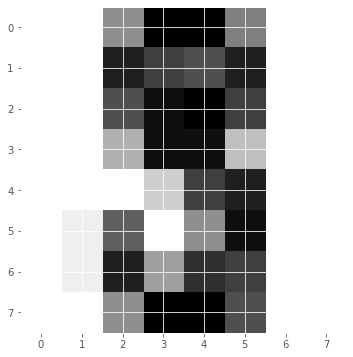

1658


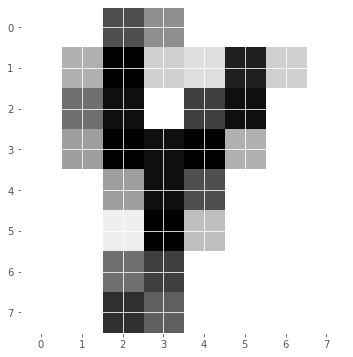

1660


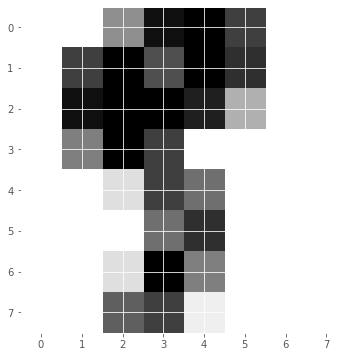

1662


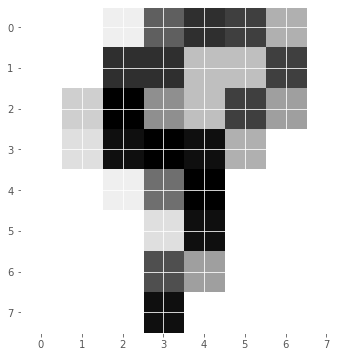

1665


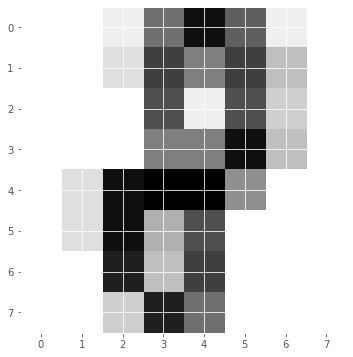

1666


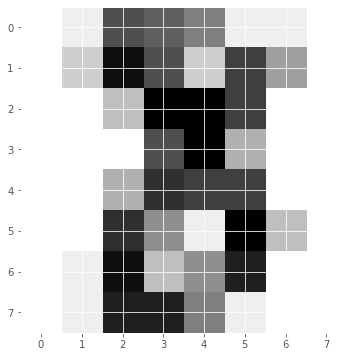

1675


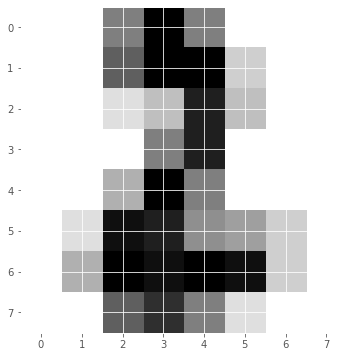

1679


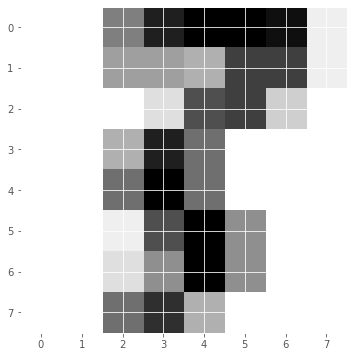

1712


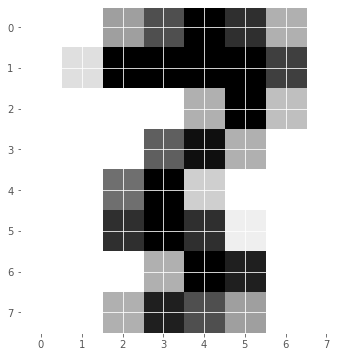

1727


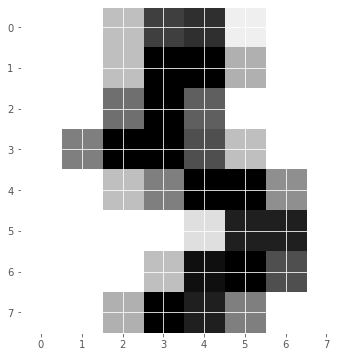

1729


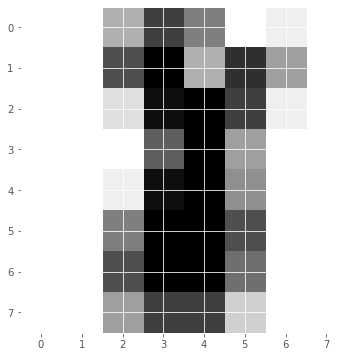

1790


In [15]:
#4
pred_all_knn = knn.predict(X)

for i in range(len(y)):
    if y[i] != pred_all_knn[i]:
        plt.figure()
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        print(i)

In [16]:
#5  - find the best value of k
        
for i in range(1,50,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = pred))    

# 1 was my best average score    

Accuracy =  0.933240611961057
Accuracy =  0.9214186369958275
Accuracy =  0.9318497913769124
Accuracy =  0.9276773296244785
Accuracy =  0.9304589707927677
Accuracy =  0.9221140472878998
Accuracy =  0.9221140472878998
Accuracy =  0.9221140472878998
Accuracy =  0.9130737134909597
Accuracy =  0.9123783031988874
Accuracy =  0.9068150208623088
Accuracy =  0.9012517385257302
Accuracy =  0.8963838664812239
Accuracy =  0.8984700973574409
Accuracy =  0.8977746870653686
Accuracy =  0.8956884561891516
Accuracy =  0.8949930458970793
Accuracy =  0.8915159944367177
Accuracy =  0.8873435326842837
Accuracy =  0.885952712100139
Accuracy =  0.8852573018080667
Accuracy =  0.8866481223922114
Accuracy =  0.8824756606397774
Accuracy =  0.8783031988873435
Accuracy =  0.8755215577190543
Accuracy =  0.8741307371349096
Accuracy =  0.8706536856745479
Accuracy =  0.8630041724617524
Accuracy =  0.8630041724617524
Accuracy =  0.8574408901251739
Accuracy =  0.8574408901251739
Accuracy =  0.8525730180806675
Accuracy =

In [17]:
#6       
x_unscaled = digits.data
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, random_state=1, test_size=0.8)       
knn_unscaled = KNeighborsClassifier(n_neighbors=10)
knn_unscaled.fit(X_train, y_train)   
knn_pred_unscaled = knn_unscaled.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = knn_pred_unscaled)) 

Accuracy =  0.9388038942976356


In [18]:
##############################################################################
##Part 2
##############################################################################  

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [19]:
#2.1
data = pd.read_csv('/Users/derekolson/DerekOlson/CS6017/homework5/OnlineNewsPopularity/OnlineNewsPopularity.csv')
data.columns = data.columns.str.replace(' ', '')

df = data.drop(['shares', 'url', 'timedelta'], axis=1)

X = pd.DataFrame(df).to_numpy()

d = pd.DataFrame(data['shares']).to_numpy()
shares = pd.DataFrame(data['shares']).to_numpy()
median_shares = np.median(shares)
shares[shares <= median_shares] = 0
shares[shares > median_shares] = 1

In [20]:
#2.2
print(np.min(d)) 
print(np.max(d)) 
#min is 1, median is 1400, max is 843300

1
843300


In [21]:
#2.3
X_train, X_test, y_train, y_test = train_test_split(X, shares.ravel(), random_state=1, test_size=0.3)
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,20)}
search = GridSearchCV(knn, params)
search.fit(X_train, y_train)
report(search.cv_results_)

Model with rank: 1
Mean validation score: 0.568 (std: 0.002)
Parameters: {'n_neighbors': 19}

Model with rank: 2
Mean validation score: 0.567 (std: 0.005)
Parameters: {'n_neighbors': 17}

Model with rank: 3
Mean validation score: 0.565 (std: 0.006)
Parameters: {'n_neighbors': 15}



In [22]:
#2.4
X_train, X_test, y_train, y_test = train_test_split(X, shares.ravel(), random_state=1, test_size=0.9)
svc = svm.SVC()
params = {'C': range(1,10)}
search = GridSearchCV(svc, params)
search.fit(X_train, y_train)
report(search.cv_results_)

Model with rank: 1
Mean validation score: 0.540 (std: 0.007)
Parameters: {'C': 9}

Model with rank: 2
Mean validation score: 0.540 (std: 0.016)
Parameters: {'C': 1}

Model with rank: 3
Mean validation score: 0.539 (std: 0.008)
Parameters: {'C': 8}



In [27]:
#2.5
X_train, X_test, y_train, y_test = train_test_split(X, shares.ravel(), random_state=1, test_size=0.3)
decisionTree = DecisionTreeClassifier()
params = {'max_depth': range(1,111, 10),'min_samples_split': range(10,1011,100)}
search = GridSearchCV(decisionTree, params)
search.fit(X_train, y_train)
report(search.cv_results_)

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 21, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 31, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 41, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 51, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 61, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 71, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 81, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.006)
Parameters: {'max_depth': 91, 'min_samples_split': 710}

Model with rank: 1
Mean validation score: 0.636 (std: 0.

[Text(321.7361680327869, 316.56705882352946, 'X[25] <= 2823.333\ngini = 0.5\nsamples = 27750\nvalue = [14102, 13648]'),
 Text(167.8002049180328, 297.38117647058823, 'X[22] <= 146702.086\ngini = 0.478\nsamples = 13235\nvalue = [8013, 5222]'),
 Text(54.885245901639344, 278.1952941176471, 'X[36] <= 0.5\ngini = 0.5\nsamples = 3692\nvalue = [1820, 1872]'),
 Text(45.73770491803279, 259.0094117647059, 'X[26] <= 1250.0\ngini = 0.499\nsamples = 3271\nvalue = [1697, 1574]'),
 Text(18.295081967213115, 239.82352941176472, 'X[25] <= 1863.896\ngini = 0.493\nsamples = 2010\nvalue = [1127, 883]'),
 Text(9.147540983606557, 220.63764705882355, 'gini = 0.454\nsamples = 648\nvalue = [422, 226]'),
 Text(27.442622950819672, 220.63764705882355, 'X[19] <= 240.349\ngini = 0.499\nsamples = 1362\nvalue = [705, 657]'),
 Text(18.295081967213115, 201.45176470588237, 'gini = 0.421\nsamples = 136\nvalue = [95, 41]'),
 Text(36.59016393442623, 201.45176470588237, 'X[2] <= 0.458\ngini = 0.5\nsamples = 1226\nvalue = [610

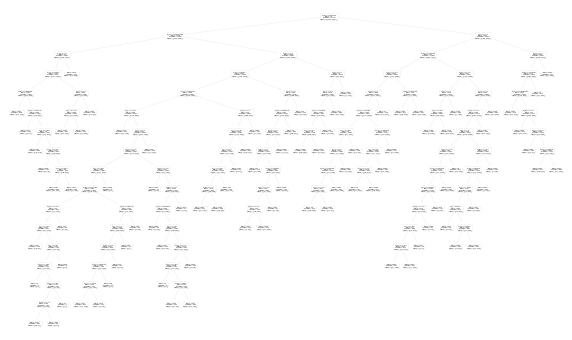

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=21, min_samples_split=710)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [24]:
#2.6

#1 Decision trees had the best model score
#2 Increasing the max_depth beyond 21 had no effect, and 710 yeilded best min_samples_split across all max_depth values.
#3 I think that the trees are easiest to interpret because one can graph the tree adn view what is responsible for the splits
#4
